In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import talib
import statsmodels.api as sm 
import os
import yfinance as yf
pd.options.display.float_format = '{:.3f}'.format

In [3]:
def get_data_close(symbol):
    stock = yf.Ticker(symbol)
    df = stock.history(period="max")
    return pd.DataFrame(df['Close'])

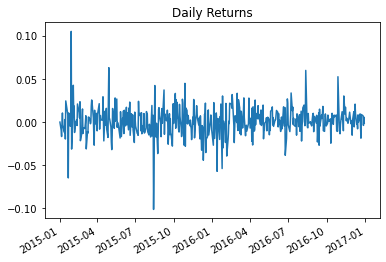

            Daily Return
2015-01-02         0.000
2015-01-05        -0.009
2015-01-06        -0.017
2015-01-07        -0.000
2015-01-08         0.011


In [6]:
def daily_return(symbol, dates, plot= False):
    '''
    This function returns or plots the daily returns of a given stock for a given time period. 
    This function accepts 3 parameters. df - the historic dataframe of the stock, date- the daterange for the plot, plot - a boolean for
    whether the user wnats to see the plot or just wants the resulting dataframe.  
    '''
    df_return = get_data_close(symbol)
    df_exp = pd.DataFrame(index = dates)
    df_exp = df_exp.join(df_return)
    df_exp.dropna(inplace = True)
    df_return = df_exp
    df_return = df_return.rename(columns = {'Close': "Daily Return"})
    df_return[1:] = (df_exp[1:]/df_exp[:-1].values)-1
    df_return.iloc[0] = 0
    if(plot==True):
        df_return['Daily Return'] = df_return['Daily Return']
        df_return['Daily Return'].plot(title = "Daily Returns")
        plt.show()
    df_return['Daily Return'] = df_return['Daily Return']
    return df_return

'''
Sample Run

dates =pd.date_range('2015-01-01','2017-01-01')
print(daily_return('AZPN', dates, True).head())
'''

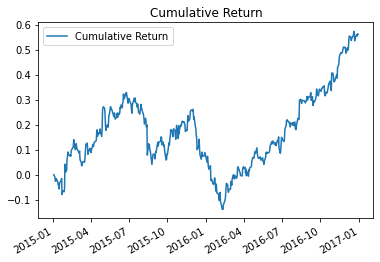

            Cumulative Return
2015-01-02              0.000
2015-01-05             -0.009
2015-01-06             -0.026
2015-01-07             -0.026
2015-01-08             -0.016


In [10]:
def cumulative_return(symbol,dates ,plot=False):
    '''
    This function calculates the bollinger bands for the given stock in the given time period. These bands are powerful indicators for 
    making the decision for selling and buying. This should not be your only indicator but it certainly helps to visualize the data and trends.
    The upper bound is mean+2*std and the lower bound is mean-2*std. These lines are plotted on the graph along with the prices. 
    The rolling mean and rolling std is calculated for the past 20 days. 
    '''
    df = get_data_close(symbol)
    df_exp = pd.DataFrame(index = dates)
    df_exp = df_exp.join(df)
    df_exp.dropna(inplace=True)
    df_cr = df_exp
    df_cr=df_cr.rename(columns = { 'Close': "Cumulative Return"})
    df_cr[1:] = (df_exp[1:]/df_exp.iloc[0])-1
    df_cr.iloc[0] = 0
    if plot== True:
        df_cr['Cumulative Return'] = df_cr['Cumulative Return']
        df_cr.plot(title = "Cumulative Return")
        plt.show()
    return df_cr

'''
Sample Run

dates =pd.date_range('2015-01-01','2017-01-01')
print(cumulative_return('AZPN', dates, True).head())
'''

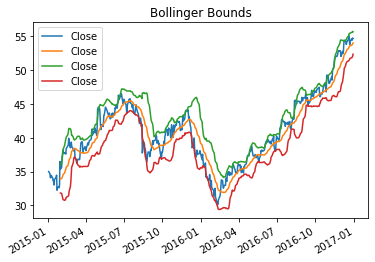

In [19]:
def bollinger_bands(symbol, dates , rolling_range = 20):
    ''' 
    This function calculates the bollinger bands for the given stock in the given time period. These bands are powerful indicators for 
    making the decision for selling and buying. This should not be your only indicator but it certainly helps to visualize the data and trends.
    The upper bound is mean+2*std and the lower bound is mean-2*std. These lines are plotted on the graph along with the prices. 
    The rolling mean and rolling std is calculated for the past 20 days by default but can be changed. 
    '''
    df_exp = pd.DataFrame(index = dates)
    df = get_data_close(symbol)
    df = df_exp.join(df)
    df.dropna(inplace=True)
    rm = df.rolling(rolling_range).mean()
    rstd =df.rolling(rolling_range).std()
    ub = rm+ 2*rstd
    lb = rm- 2*rstd
    ax = df.plot(title = "Bollinger Bounds")
    rm=rm.rename(columns = {"Adj Close" : "Rolling Mean "})
    rm.plot(label = "Rolling Mean", ax=ax)
    ub=ub.rename(columns = {"Adj Close" : "Upper Bound"})
    ub.plot(label = "Upper Bound", ax=ax)
    lb=lb.rename(columns = {"Adj Close" : "Lower Bound"})
    lb.plot(label = "Lower Bound", ax=ax)
    plt.show()
    
'''
dates =pd.date_range('2015-01-01','2017-01-01')
bollinger_bands("AZPN", dates)
'''